In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
iris = pd.read_csv('C:/Users/ak/Desktop/techbees/datasets/iris.csv')

In [3]:
setosa=iris[iris['species']=='setosa']
versicolor =iris[iris['species']=='versicolor']
virginica =iris[iris['species']=='virginica']

In [4]:
setosa.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

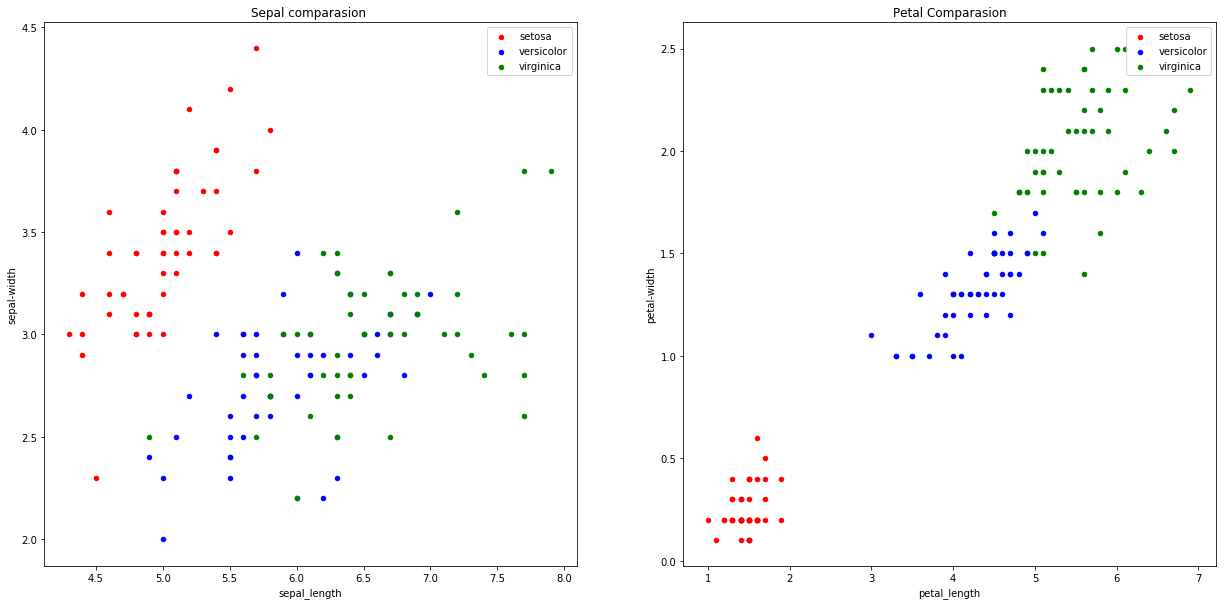

In [5]:
#for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x='sepal_length', y='sepal_width', kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x='sepal_length', y='sepal_width',kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x='sepal_length', y='sepal_width', kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x='petal_length', y='petal_width', kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x='petal_length', y='petal_width',kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x='petal_length', y='petal_width', kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
# plt.show()
# plt.close()

#satosa   - satosa Petal are relatively smaller than rest of species .can be easily separable from rest of Species 
#versicolor & virginica are also separable in Petal comprasion
#satoa sepal are smallest in length and largest in Width than other species

In [ ]:
setosa.columns

In [6]:
iris.shape

(150, 5)

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Separating dependednt & Indepented Variables 
x = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [11]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test)

In [12]:
type(X_train)

numpy.ndarray

In [13]:
X_train= pd.DataFrame(X_train,columns=iris.columns[:-1])

In [14]:
X_test = pd.DataFrame(X_test,columns=iris.columns[:-1])

In [15]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,-3.616155e-16,-9.621933e-16,-1.480297e-16,-1.057355e-18
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.929549e+00,-1.964531e+00,-1.620540e+00,-1.491011e+00
25%,-9.400369e-01,-7.871578e-01,-1.275628e+00,-1.227004e+00
50%,-7.421344e-02,-8.073413e-02,2.764773e-01,9.303107e-02
75%,6.679210e-01,6.256895e-01,7.363603e-01,7.530488e-01
max,2.523257e+00,3.215910e+00,1.771097e+00,1.677074e+00


In [16]:
# Building KNN classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[16  1  0]
 [ 0 15  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        17
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.92      0.96        13

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



In [19]:
# Choosing the right value of K
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

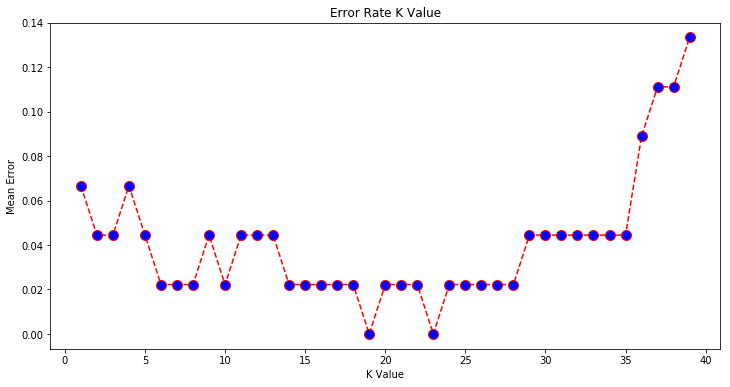

In [20]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [23]:
# Building KNN classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=19)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [24]:
y_pred = classifier.predict(X_test)
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

